# Go Go Curry Data Exploratory Analysis

## Preparing the Dataset

In [30]:
#install packages
!pip install pandas
!pip install openpyxl
!pip install matplotlib seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00


In [31]:
#import packages
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#convert Excel file to dataFrame for analysis
df = pd.read_excel('Go Go Curry Stores.xlsx')
df.head()

,Region (JP),Region (Eng),Prefecture (JP),Prefecture (Eng),Name (JP),Address,Visited,First Visited,Tabelog Rating (Sept 2024),Tabelog Review Count (Sept 2024),Tabelog Link,Google Rating (Sept 2024),Google Review Count (Sept 2024),Google Maps Link,Shareable Maps Link,Open/Closed
0,関東,Kanto,東京,Tokyo,ゴーゴーカレー新宿東口駅前スタジアム,〒160-0022 東京都新宿区新宿3-25-9 高橋ビルB1F,True,2015-05-01,3.08,68.0,https://tabelog.com/tokyo/A1304/A130401/13153638/,3.8,446.0,https://www.google.com/maps/place/Go!+Go!+Curr...,https://maps.app.goo.gl/nxFG8SZ6rt9asKaC7,Open
1,関東,Kanto,東京,Tokyo,ゴーゴーカレー新宿御苑スタジアム,〒160-0022 東京都新宿区新宿2-8-17 SYビル2F,False,NaT,3.08,81.0,https://tabelog.com/tokyo/A1304/A130402/13144127/,3.7,395.0,https://www.google.com/maps/place/Go+Go+Curry+...,https://maps.app.goo.gl/FU5Prctd91JjXN1t9,Open
2,関東,Kanto,東京,Tokyo,ゴーゴーカレー歌舞伎町スタジアム,〒160-0021 東京都新宿区歌舞伎町2-45-1 第5ライデンビル1F,False,NaT,3.09,72.0,https://tabelog.com/tokyo/A1304/A130401/13143680/,3.7,411.0,https://www.google.com/maps/place/Go+Go+Curry+...,https://maps.app.goo.gl/gumLs2NRZaPtiFVV9,Open
3,関東,Kanto,東京,Tokyo,ゴーゴーカレー羽田エアポートガーデンパーク,〒144-0041 東京都大田区羽田空港2-7、羽田エアポートガーデン1F「カレーは日本の...,True,2023-04-01,3.03,15.0,https://tabelog.com/tokyo/A1315/A131504/13281838/,3.3,43.0,https://www.google.com/maps/place/Japan+Loves+...,https://maps.app.goo.gl/u9oxJPXcxDR3PiMW6,Open
4,関東,Kanto,東京,Tokyo,ゴーゴーカレー秋葉原1号店,〒101-0025 東京都千代田区神田佐久間町1-16-1 大橋ビル1F,False,NaT,3.28,315.0,https://tabelog.com/tokyo/A1310/A131001/13019730/,3.8,1364.0,https://www.google.com/maps/place/Go+Go+Curry+...,https://maps.app.goo.gl/7SNacSnQqNEf5t3K9,Open


In [14]:
#understand the shape of the data and data types
print('Rows,', 'Columns')
print(df.shape)
print('Column Names and Data Types')
print(df.dtypes)

Rows, Columns
(90, 16)
Column Names and Data Types
Region (JP)                                 object
Region (Eng)                                object
Prefecture (JP)                             object
Prefecture (Eng)                            object
Name (JP)                                   object
Address                                     object
Visited                                       bool
First Visited                       datetime64[ns]
Tabelog Rating (Sept 2024)                 float64
Tabelog Review Count (Sept 2024)           float64
Tabelog Link                                object
Google Rating (Sept 2024)                  float64
Google Review Count (Sept 2024)            float64
Google Maps Link                            object
Shareable Maps Link                         object
Open/Closed                                 object
dtype: object


In [5]:
#connect to database in order to write SQL queries
conn = sqlite3.connect('my_database.db')

df.to_sql('master_table', conn, if_exists='replace', index=False)

90

## Exploring the Dataset 

In [26]:
#Get the mean values for review counts on each site
print('Mean Google Rating:')
print(df['Google Rating (Sept 2024)'].mean())
print('Mean Tabelog Rating:')
print(df['Tabelog Rating (Sept 2024)'].mean())
print('Mean Google Review Count:')
print(df['Google Review Count (Sept 2024)'].mean())
print('Mean Tabelog Review Count:')
print(df['Tabelog Review Count (Sept 2024)'].mean())


Mean Google Rating:
3.7340909090909093
Mean Tabelog Rating:
3.0789772727272724
Mean Google Review Count:
267.90909090909093
Mean Tabelog Review Count:
56.52272727272727


In [28]:
#Establish if there are any outliers in the 4 columns above
print("\nOutlier Detection Using IQR:")
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    print(f"{column}: {outliers} outliers")


Outlier Detection Using IQR:
Tabelog Rating (Sept 2024): 6 outliers
Tabelog Review Count (Sept 2024): 5 outliers
Google Rating (Sept 2024): 4 outliers
Google Review Count (Sept 2024): 3 outliers


In [32]:
#Prepare data to create boxplots
bp1 = 'Google Rating (Sept 2024)'
bp2 = 'Tabelog Rating (Sept 2024)'
bp3 = 'Google Review Count (Sept 2024)'
bp4 = 'Tabelog Review Count (Sept 2024)'

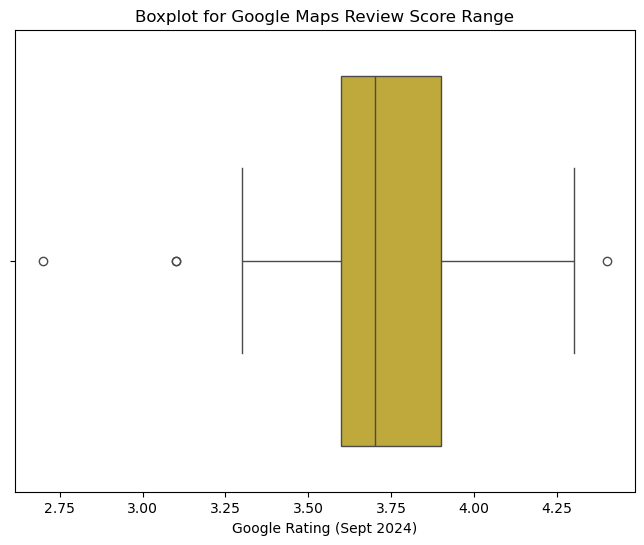

In [44]:
#Create a boxplot for Google Maps review scores
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=bp1, color='#D5B726')
plt.title('Boxplot for Google Maps Review Score Range')
plt.xlabel(bp1)
plt.show()

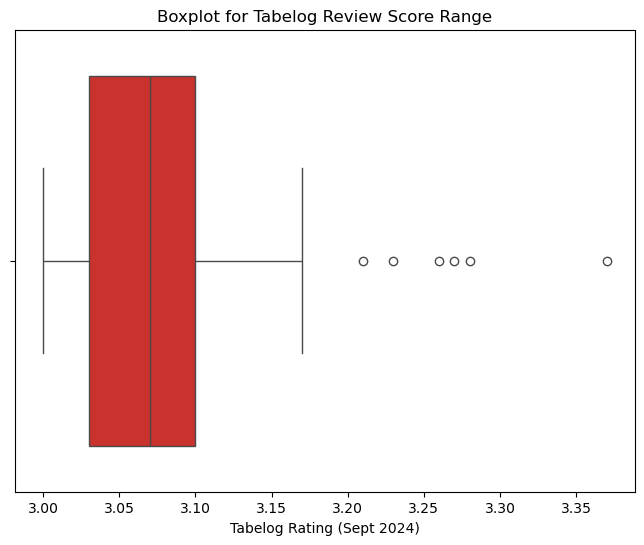

In [43]:
#Create a boxplot for Tabelog review scores
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=bp2, color='#E31A13')
plt.title('Boxplot for Tabelog Review Score Range')
plt.xlabel(bp2)

plt.show()

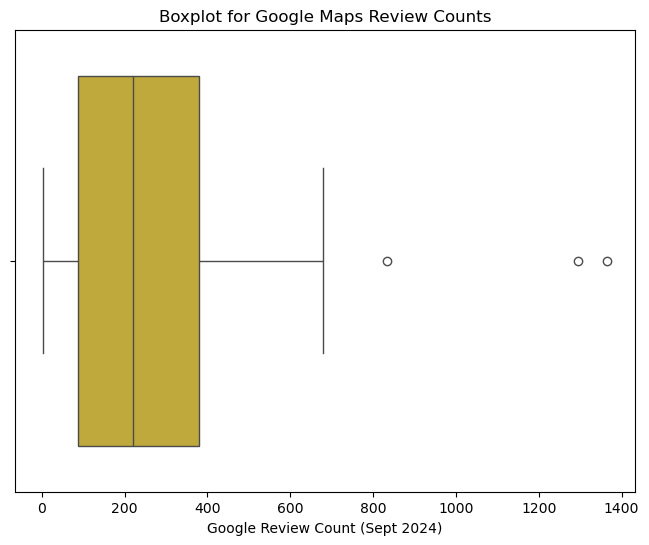

In [45]:
#Create a boxplot for Google Maps review counts
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=bp3, color='#D5B726')
plt.title('Boxplot for Google Maps Review Counts')
plt.xlabel(bp3)
plt.show()

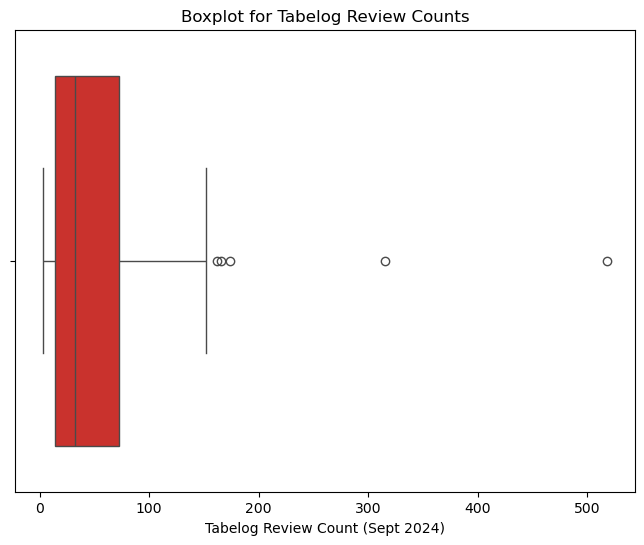

In [46]:
#Create a boxplot for Tabelog review counts
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=bp4, color='#E31A13')
plt.title('Boxplot for Tabelog Review Counts')
plt.xlabel(bp4)

plt.show()

## Creating New Tables for Analysis in Power BI

In [6]:
#write a SQL Query to pull the top store for each region based on highest average Google Rating. If there is a tie, select the store with the highest number of reviews. 
query1 = '''

WITH RankedStores AS (
    SELECT
        "Region (Eng)",
        "Name (JP)",
        "Google Rating (Sept 2024)",
        "Google Review Count (Sept 2024)",
        ROW_NUMBER() OVER (
            PARTITION BY "Region (Eng)" 
            ORDER BY "Google Rating (Sept 2024)" DESC, "Google Review Count (Sept 2024)" DESC
        ) AS rn
    FROM master_table
)
SELECT
    "Region (Eng)",
    "Name (JP)",
    "Google Rating (Sept 2024)"
FROM RankedStores
WHERE rn = 1
ORDER BY "Google Rating (Sept 2024)" DESC;
'''

df1 = pd.read_sql_query(query1, conn)

df1

,Region (Eng),Name (JP),Google Rating (Sept 2024)
0,Kinki,ゴーゴーカレー通天閣フィールド,4.4
1,Chugoku,ゴーゴーカレー&アリカフェ浜乃木店,4.3
2,Kyushu,ゴーゴーカレー対馬パーク,4.3
3,Tohoku,ゴーゴーカレー盛岡インターパーク,4.3
4,Chubu,ゴーゴーカレー松任徳光スタジアム,4.2
5,Kanto,ゴーゴーカレープレナ幕張スタジアム,4.1
6,Hokkaido,ゴーゴーカレー北海道大学前スタジアム,3.8


In [8]:
#write a SQL Query to pull the top store for each region based on highest average Tabelog Rating. If there is a tie, select the store with the highest number of reviews. 
query2 = '''

WITH RankedStores AS (
    SELECT
        "Region (Eng)",
        "Name (JP)",
        "Tabelog Rating (Sept 2024)",
        "Tabelog Review Count (Sept 2024)",
        ROW_NUMBER() OVER (
            PARTITION BY "Region (Eng)" 
            ORDER BY "Tabelog Rating (Sept 2024)" DESC, "Tabelog Review Count (Sept 2024)" DESC
        ) AS rn
    FROM master_table
)
SELECT
    "Region (Eng)",
    "Name (JP)",
    "Tabelog Rating (Sept 2024)"
FROM RankedStores
WHERE rn = 1
ORDER BY "Tabelog Rating (Sept 2024)" DESC;
'''

df2 = pd.read_sql_query(query2, conn)

df2

,Region (Eng),Name (JP),Tabelog Rating (Sept 2024)
0,Chubu,ゴーゴーカレー金沢駅総本山,3.37
1,Kanto,ゴーゴーカレー秋葉原1号店,3.28
2,Kinki,ゴーゴーカレー藤井寺フィールド,3.27
3,Tohoku,ゴーゴーカレー仙台一番町スタジアム,3.12
4,Chugoku,ゴーゴーカレー岡山中仙道スタジアム,3.10
5,Hokkaido,ゴーゴーカレー北海道大学前スタジアム,3.08
6,Kyushu,ゴーゴーカレー博多バスターミナルスタジアム,3.07


In [11]:
#write a SQL Query to pull the top store for each region based on highest number of Google Reviews.
query3 = '''

SELECT
    "Region (Eng)",
    "Name (JP)",
    MAX("Google Review Count (Sept 2024)")
FROM master_table
GROUP BY "Region (Eng)"
ORDER BY "Google Review Count (Sept 2024)" DESC;
'''

df3 = pd.read_sql_query(query3, conn)

df3

,Region (Eng),Name (JP),"MAX(""Google Review Count (Sept 2024)"")"
0,Kanto,ゴーゴーカレー秋葉原1号店,1364.0
1,Chubu,ゴーゴーカレー金沢駅総本山,1294.0
2,Kinki,ゴーゴーカレー宇治大久保店,680.0
3,Chugoku,ゴーゴーカレー岡山中仙道スタジアム,620.0
4,Tohoku,ゴーゴーカレー仙台一番町スタジアム,498.0
5,Kyushu,ゴーゴーカレー博多バスターミナルスタジアム,451.0
6,Hokkaido,ゴーゴーカレー北海道大学前スタジアム,148.0


In [12]:
#write a SQL Query to pull the top store for each region based on highest number of Tabelog Reviews.
query4 = '''

SELECT
    "Region (Eng)",
    "Name (JP)",
    MAX("Tabelog Review Count (Sept 2024)")
FROM master_table
GROUP BY "Region (Eng)"
ORDER BY "Tabelog Review Count (Sept 2024)" DESC;
'''

df4 = pd.read_sql_query(query4, conn)

df4

,Region (Eng),Name (JP),"MAX(""Tabelog Review Count (Sept 2024)"")"
0,Chubu,ゴーゴーカレー金沢駅総本山,518.0
1,Kanto,ゴーゴーカレー秋葉原1号店,315.0
2,Kinki,ゴーゴーカレー宇治大久保店,128.0
3,Chugoku,ゴーゴーカレー岡山中仙道スタジアム,95.0
4,Kyushu,ゴーゴーカレー博多バスターミナルスタジアム,91.0
5,Tohoku,ゴーゴーカレー仙台一番町スタジアム,67.0
6,Hokkaido,ゴーゴーカレー北海道大学前スタジアム,42.0


In [14]:
#export the new tables to Excel for upload into Power BI
df1.to_excel('top_google_ratings.xlsx', index=False)
df2.to_excel('top_tabelog_ratings.xlsx', index=False)
df3.to_excel('top_google_counts.xlsx', index=False)
df4.to_excel('top_tabelog_counts.xlsx', index=False)
print("done")

done
